# Lab | Imbalanced data

### 1. Load the dataset and explore the variables.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [100]:
# load the data
data=pd.read_csv('files_for_lab/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
# check the number of columns
data.shape

(7043, 21)

In [102]:
# check the null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [103]:
#check the data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [104]:
# remove columns 
selected_columns = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']
data1 = data[selected_columns]
data1.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [105]:
# investigate 'Chrun'
data1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The majority of the value us 'NO': 5174, while the number of 'Yes' is 1869. 

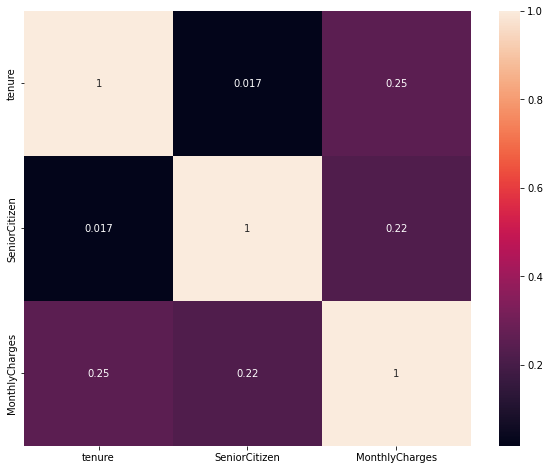

In [106]:
# investigate numerical values 
corr_matrix=data1.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

There is no multicolinearity this time.

In [107]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


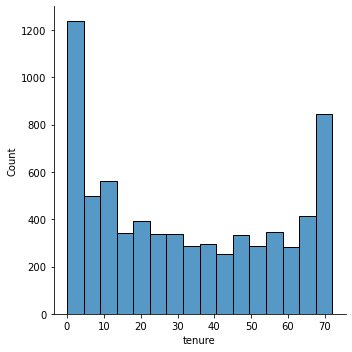

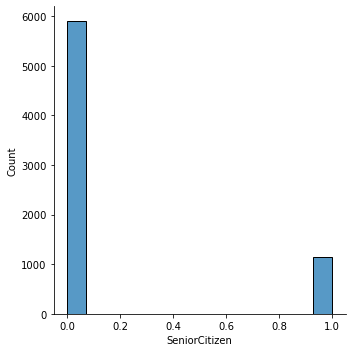

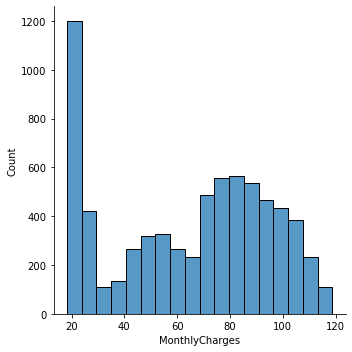

In [108]:
import numpy as np

def plot_distributions(df):
    numerical_columns = data1.select_dtypes(np.number)
    for col in numerical_columns:
        sns.displot(data1[col])
        plt.show()

plot_distributions(data1)

In [109]:
data1['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

the scale of each column is different. Therefore, Min-Max scaler has to be used later.  

Using numerical labels (1 and 0) for the target variable can make it easier to calculate evaluation metrics like precision, recall, and F1 score. Therefore, the values of 'Churn' is changed into 1 and 0.

In [110]:
display(data1["Churn"].value_counts())

#data1.loc[:, 'Churn'] = data1['Churn'].replace({'Yes': 1, 'No': 0}).copy()
data1.loc[data1['Churn'] == 'Yes', 'Churn'] = 1
data1.loc[data1['Churn'] == 'No', 'Churn'] = 0


display(data1["Churn"].value_counts())
display(data1['Churn'].dtypes)

No     5174
Yes    1869
Name: Churn, dtype: int64

0    5174
1    1869
Name: Churn, dtype: int64

dtype('O')

In [111]:
data1.isnull().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
Churn             0
dtype: int64

### 3.Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [112]:
# use x/y split
data2 = data1.copy()

y = data2['Churn']
X = data2.drop('Churn', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

### 4. Build the logistic regression model.

In [75]:
# use MinMaxScaler

from sklearn.preprocessing import MinMaxScaler


# Scaling data
transformer = MinMaxScaler().fit(X_train)

X_train_normalized = transformer.transform(X_train)
X_test_normalized  = transformer.transform(X_test)

X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train.columns, index= X_train.index)
X_test_norm  = pd.DataFrame(X_test_normalized, columns=X_test.columns, index= X_test.index)

In [76]:
#check
X_train_norm.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.447893,0.162407,0.462516
std,0.341677,0.368856,0.300186
min,0.000000,0.000000,0.000000
25%,0.125000,0.000000,0.170647
50%,0.402778,0.000000,0.518408
75%,0.763889,0.000000,0.712935
max,1.000000,1.000000,1.000000


In [77]:
# apply Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_norm, y_train)

LogisticRegression(random_state=0)

### 5. Evaluate the model

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_norm, y_test)))

The accuracy of the model in the TEST set is: 0.80


In [79]:
print(y_test.value_counts())

0    1036
1     373
Name: Churn, dtype: int64


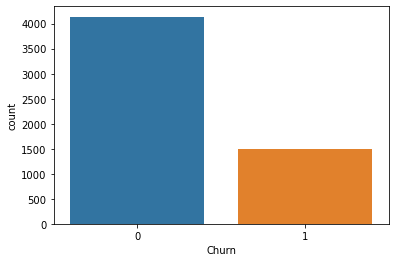

In [95]:
#sns.countplot(y_train)
sns.countplot(data=y_train, x=y_train)

plt.show()

In [82]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_norm)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))


The accuracy in the TEST set is: 0.80
The precision in the TEST set is: 0.69
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.55
The Kappa in the TEST set is: 0.43


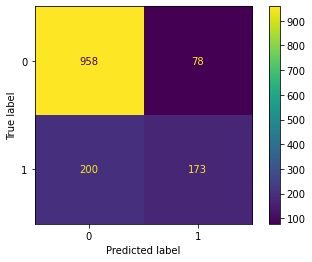

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### 6. Even a simple model will give us more than 70% accuracy. Why?

#### The accuracy is 80% because the majority of value of 'Churn' is 'NO'(0). More than 70% of test set belongs to 'No'. Therefore, it is easy to predict to say 'No'. Looking at the F1 and Kappa, these values are not so high. In addition, recall is quite low.

### 7.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [86]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8276, 3)


In [87]:
y_train_SMOTE.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()  
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_norm)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.74
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.73
The F1 in the TEST set is: 0.60
The Kappa in the TEST set is: 0.42


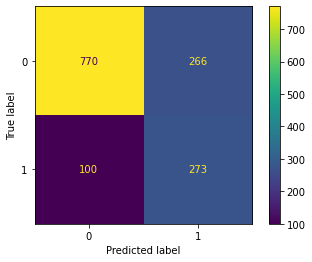

In [93]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

####  BY using SMOTE, the value of the recall significantly increased by 0.27. The percentages of the accuracy and the precision slightly reduced. However, the values of the F1 and the Kappa show that the model still does not have a great performance. 
#### In conclusion, although there is improvement for the recall, this logistic regression model is not ideal.     